In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
# Import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [3]:
# load the dataset
df = pd.read_csv('/content/drive/My Drive/GuwahatiCovidcsv.csv')
df.head()

,From Date,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
0,18-02-2019 00:00,58.04,6.40,15.73,NaN,1.86,229.44,0.22,1002.19,0.00,20.87
1,18-02-2019 01:00,60.00,6.08,18.36,NaN,1.54,217.20,1.46,956.00,0.24,18.92
2,18-02-2019 02:00,55.50,6.71,34.54,NaN,0.66,197.21,NaN,1001.60,0.00,18.33
3,18-02-2019 03:00,66.56,7.00,31.85,NaN,0.61,206.44,NaN,1001.41,0.00,17.63
4,18-02-2019 04:00,67.08,9.45,24.07,NaN,0.54,230.53,NaN,980.67,0.00,16.61


In [4]:
# Drop the Unnamed: 0 column from the dataframe
df = df.drop(columns=["From Date" , "Ozone" , "RH" , "WS" , "WD" , "SR"])

# Display the number of missing values in each column of the dataframe
df.isna().sum()

PM2.5     1816
NO2        674
BP       11191
RF         444
AT        1605
dtype: int64

In [5]:
# Replace NaN values with 0
df = df.fillna(0)

# Verify that there are no more missing values
missing_values_after_replacement = df.isna().sum()
print(missing_values_after_replacement)

PM2.5    0
NO2      0
BP       0
RF       0
AT       0
dtype: int64


In [6]:
df.describe().T ##Gebratinf Statistics of the Dataframe

,count,mean,std,min,25%,50%,75%,max
PM2.5,33067.0,56.420060,64.558689,0.0,15.86,32.92,76.64,923.08
NO2,33067.0,9.636764,11.190006,0.0,2.65,5.29,12.19,107.04
BP,33067.0,642.939402,461.137671,0.0,0.00,960.65,995.78,1011.81
RF,33067.0,0.079043,0.235679,0.0,0.00,0.00,0.00,3.75
AT,33067.0,23.550587,7.263968,0.0,20.60,25.17,28.18,38.20


In [7]:
# Compute the pairwise correlation between the columns and the target variable heart.disease
df.corrwith(df["PM2.5"])

PM2.5    1.000000
NO2      0.348829
BP      -0.301334
RF      -0.033509
AT      -0.329648
dtype: float64

In [8]:
##Splitting the datafrme into feartures matrix and the target vector y
X = df.drop(columns=["PM2.5"])
y = df['PM2.5']

##displaying the first rows
X.head()

,NO2,BP,RF,AT
0,6.40,1002.19,0.00,20.87
1,6.08,956.00,0.24,18.92
2,6.71,1001.60,0.00,18.33
3,7.00,1001.41,0.00,17.63
4,9.45,980.67,0.00,16.61


In [9]:
# Split the feature matrix X and the target vector y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [10]:
# Initializing the model
model = RandomForestRegressor(n_estimators=100, max_depth=100)

# Fitting the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100)

RMSE:  53.71186213116274


Text(0, 0.5, 'Predicted')

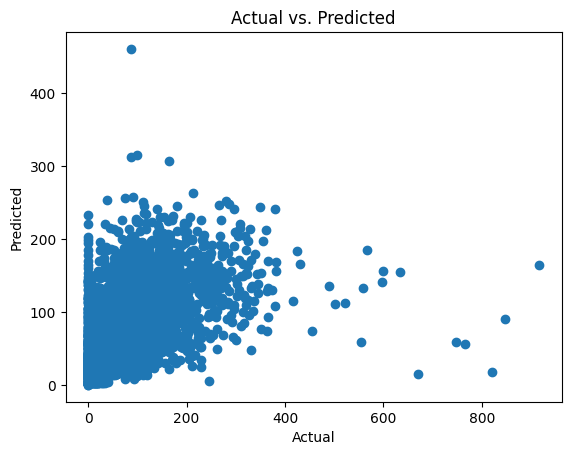

In [11]:
# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# Plotting a scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0.5, 1.0, 'Feature Importance')

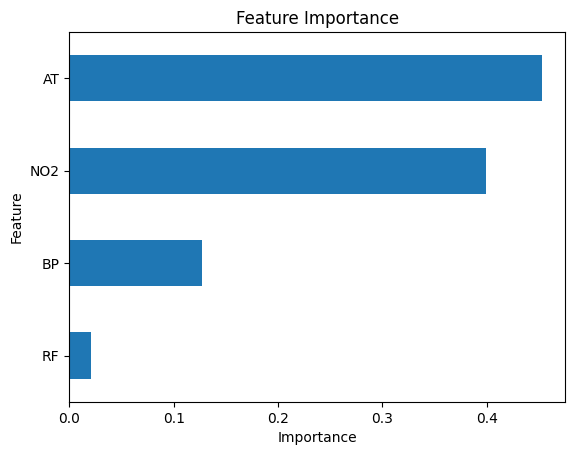

In [12]:
# Getting feature names from training data
features = X_train.columns

# Extracting importances from model
importances = model.feature_importances_

# Creating a series with feature names and importances
feat_imp = pd.Series(importances, index=features)

# Plotting the 10 most important features
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [13]:
#Now that we are satisfied with our model, we can define a new model object,
#which we will train on the full data set:"""
model_full= RandomForestRegressor(n_estimators=100, max_depth=100,
random_state =42)
model_full.fit(X, y)

RandomForestRegressor(max_depth=100, random_state=42)

The model_full object has a predict method that will serve as the function we will optimize, also called the objective function. The goal of our optimization task is to find the values for each of the inputs that optimize the cement strength.

In [14]:
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand
import math

In [22]:
# def obj_fun(X):
#     """
#     This function takes a list X as input and returns the negative result of
#     model.predict.


#     Parameters:
#     X (list): A list of values.

#     Returns:
#     float: The negative of the prediction result from the full model.
#     """

#     # Converting X into a list of lists to make it compatible for model prediction
#     X = [X]

#     # Getting the prediction result from the full model
#     results = model_full.predict(X)

#     # Returning the negative of the prediction result
#     return -results

def obj_fun(X):
    """
    This function takes a list X as input and returns the negative result of
    model.predict.


    Parameters:
    X (list): A list of values.

    Returns:
    float: The negative of the prediction result from the full model.
    """

    # Converting X into a list of lists to make it compatible for model prediction
    X = [X]

    # **Check if the number of features in X matches the model's expectations**
    if len(X[0]) != model_full.n_features_in_:
        raise ValueError(f"X has {len(X[0])} features, but model_full is expecting {model_full.n_features_in_} features as input.")

    # Getting the prediction result from the full model
    results = model_full.predict(X)

    # Returning the negative of the prediction result
    return -results


In [30]:

def decode(bounds, n_bits, bitstring):
    """
    Decode binary bitstring to numbers for each input and scale the value to fall within the defined bounds.

    Parameters:
    bounds (list): A list of tuples that define the lower and upper bounds for each decoded value.
    n_bits (int): The number of bits used to represent each decoded value.
    bitstring (str): A binary string to be decoded.

    Returns:
    list: A list of decoded and scaled values.
    """
    decoded = list()  # Create empty list to hold the decoded values
    largest = 2**n_bits  # Largest value - for 16 bit this would be 65536
    for i in range(len(bounds)):
        # extract the substring
        start, end = i * n_bits, (i * n_bits) + n_bits  # Define start and end indices corresponding to each substring
        substring = bitstring[start:end]  # Extract the substring corresponding to each value
        # convert bitstring to a string of chars
        chars = ''.join([str(s) for s in substring])  # Join all values in the substring together, into chars from a list
        # convert string to integer
        integer = int(chars, 2)  # Convert a base-2 binary number string into an int
        # scale integer to desired range
        value = bounds[i][0] + (integer / largest) * (bounds[i][1] - bounds[i][0])  # Scale to a value between our defined bounds
        # store
        decoded.append(value)
    return decoded




In [24]:
"""
The following code implements three functions that are part of a genetic algorithm: tournament selection, crossover, and mutation.

The selection function selects a candidate from the population for further processing, based on their score.
The crossover function takes two parent candidates and creates two children from them. It has a crossover rate parameter that determines the likelihood of recombination.
The mutation function mutates a candidate string, flipping bits with a certain probability determined by the mutation rate.
"""

def selection(pop, scores, k=3):
    """
    Select the best individuals for the next generation based on their fitness (scores).
    This function randomly selects k individuals from the population and performs a tournament
    among them to choose the one with the best score.

    Parameters:
    pop (list): The population of individuals.
    scores (list): The fitness scores for each individual in the population.
    k (int, optional): The number of individuals to select from the population for the tournament.
                        Defaults to 3.

    Returns:
    individual: The best individual from the tournament.
    """
    # Randomly select one index from the population as the initial selection
    selection_ix = randint(len(pop))
    # Perform a tournament among k randomly selected individuals
    for ix in randint(0, len(pop), k-1):
        # Check if the current individual has a better score than the selected one
        if scores[ix] < scores[selection_ix]:
            # Update the selected individual if a better one is found
            selection_ix = ix
    # Return the best individual from the tournament
    return pop[selection_ix]

def crossover(p1, p2, r_cross):
    """
    Create two children from two parents using the crossover operation.
    The children are created by copying the parents, and recombination occurs
    if a random value is less than the crossover rate.

    Parameters:
    p1 (list): The first parent.
    p2 (list): The second parent.
    r_cross (float): The crossover rate.

    Returns:
    list: A list containing the two children.
    """
    # Children are copies of the parents by default
    c1, c2 = p1.copy(), p2.copy()
    # Check if recombination should occur
    if rand() < r_cross:
        # Select a crossover point (not at the end of the string)
        pt = randint(1, len(p1)-2)
        # Perform crossover in the children
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    # Return the two children
    return [c1, c2]


import random

def mutation(bitstring, r_mut):
    """
    The mutation process changes the value of some features in the offspring at random to maintain the diversity in the population.
    A standard value for the mutation rate is 1/m where m is the number of features.

    Parameters:
    bitstring (list): A list of binary values representing the offspring
    r_mut (float): The mutation rate, typically 1/m where m is the number of features

    Returns:
    list: The modified bitstring after mutation

    """
    rand = random.random
    for i in range(len(bitstring)):
        # Check for a mutation
        if rand() < r_mut:
            # Flip the bit
            bitstring[i] = 1 - bitstring[i]
    return bitstring


In [36]:
### Putting all together into our Genetic algorithm that runs until it finds the best
#The whole fitness assignment, selection, recombination, and mutation process is
#repeated until a stopping criterion is satisfied.
#Each generation is likely to be more adapted to the environment than the old one.

# genetic algorithm implementation
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    """
    The genetic algorithm that finds the optimal solution by performing the fitness assignment, selection, recombination, and mutation process repeatedly.
    Each iteration, the solution is more adapted to the environment.

    Parameters
    ----------
    objective: function
        The objective function that needs to be optimized.
    bounds: list of tuples
        The bounds of the solution.
    n_bits: int
        The number of bits used to encode the solution.
    n_iter: int
        The number of iterations to perform.
    n_pop: int
        The size of the population.
    r_cross: float
        The crossover rate.
    r_mut: float
        The mutation rate.

    Returns
    -------
    list
        The best solution and its evaluation.
    """
    # initialize the population with random bitstrings
    pop = [randint(0, 2, n_bits * len(bounds)).tolist() for _ in range(n_pop)]


    # track the best solution found so far
    best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))

    # iterate over generations
    for gen in range(n_iter):
        # decode the population
        decoded = [decode(bounds, n_bits, p) for p in pop]
        # evaluate all candidates in the population
        scores = [objective(d) for d in decoded]
        # check for a new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))

        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]

        # create the next generation - children
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i + 1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace the population
        pop = children
    return [best, best_eval]

In [38]:
import numpy as np
from random import randint, random

# Objective function (example: assume a simple function)
def obj_fun(vector):
    # Example: Sum of vector components
    return sum(vector)

# Decode bitstring to real values
def decode(bounds, n_bits, bitstring):
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        # Extract substring
        start, end = i * n_bits, (i + 1) * n_bits
        substring = bitstring[start:end]
        # Convert bitstring to integer
        integer = int(''.join(map(str, substring)), 2)
        # Scale integer to desired range
        value = bounds[i][0] + (integer / float(largest)) * (bounds[i][1] - bounds[i][0])
        decoded.append(value)
    return decoded

# Tournament selection
def selection(pop, scores, k=3):
    selection_ix = randint(0, len(pop) - 1)
    for ix in [randint(0, len(pop) - 1) for _ in range(k-1)]:
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# Crossover two parents to create two children
def crossover(p1, p2, r_cross):
    c1, c2 = p1.copy(), p2.copy()
    if random() < r_cross:
        pt = randint(1, len(p1) - 2)
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# Mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if random() < r_mut:
            bitstring[i] = 1 - bitstring[i]

# Genetic algorithm implementation
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    # Initialize the population with random bitstrings
    pop = [[randint(0, 1) for _ in range(n_bits * len(bounds))] for _ in range(n_pop)]

    # Track the best solution found so far
    best, best_eval = pop[0], objective(decode(bounds, n_bits, pop[0]))

    # Iterate over generations
    for gen in range(n_iter):
        # Decode the population
        decoded = [decode(bounds, n_bits, p) for p in pop]
        # Evaluate all candidates in the population
        scores = [objective(d) for d in decoded]
        # Check for a new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %f" % (gen, decoded[i], scores[i]))

        # Select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]

        # Create the next generation - children
        children = list()
        for i in range(0, n_pop, 2):
            # Get selected parents in pairs
            p1, p2 = selected[i], selected[i + 1]
            # Crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # Mutation
                mutation(c, r_mut)
                # Store for next generation
                children.append(c)
        # Replace the population
        pop = children
    return [best, best_eval]

# Define the parameters for the genetic algorithm
bounds = [
    [df['NO2'].min(), df['NO2'].max()],
    [df['BP'].min(), df['BP'].max()],
    [df['RF'].min(), df['RF'].max()],
    [df['AT'].min(), df['AT'].max()]
]
n_iter = 10
n_bits = 16
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / (float(n_bits) * len(bounds))

# Perform the genetic algorithm search
best, score = genetic_algorithm(obj_fun, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print("Best Solution: ", decode(bounds, n_bits, best))
print("Best Score: ", score)


>0, new best f([3.48873046875, 140.4794187927246, 1.9928741455078125, 17.885848999023438]) = 163.846872
>0, new best f([18.60166259765625, 9.186202239990234, 1.2022018432617188, 17.227188110351562]) = 46.217255
>1, new best f([18.58859619140625, 9.186202239990234, 1.2022018432617188, 17.182888793945313]) = 46.159889
>2, new best f([2.49731689453125, 9.186202239990234, 1.2022018432617188, 17.257498168945315]) = 30.143219
>3, new best f([2.49731689453125, 10.313248901367187, 3.5431480407714844, 1.619256591796875]) = 17.972970
>4, new best f([2.49731689453125, 10.313248901367187, 3.5431480407714844, 1.3208190917968752]) = 17.674533
>4, new best f([5.53852294921875, 1.6519725036621093, 0.6712532043457031, 3.1569091796875]) = 11.018658
>6, new best f([1.33114013671875, 1.6519725036621093, 0.4945564270019531, 2.5606170654296876]) = 6.038286
>7, new best f([1.33114013671875, 1.6519725036621093, 0.4202842712402344, 1.9118652343750002]) = 5.315262
>8, new best f([1.32787353515625, 0.80282775878

In [47]:
decoded = decode(bounds, n_bits, best)
print('The result is (%s) with a score of %f' % (decoded, score*1))

The result is ([1.33114013671875, 1.6519725036621093, 0.5540657043457031, 1.0678466796875001]) with a score of 4.605025


Using a ready-to-use python library for genetic algorithm

In [40]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 690.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=ea57d2de2a452a49b67d29f4c4fce684653e05e8c8ce8a92a82edf3b87c09510
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [41]:
# Import the geneticalgorithm module and assign an alias to it
from geneticalgorithm import geneticalgorithm as ga

# Define the objective function
def obj_fun(X):
    """
    This function is used as an objective function to be minimized by the genetic algorithm.
    It calculates the prediction results from a given input X and returns the negative results.

    Parameters:
    X (list): Input variables

    Returns:
    float: Negative prediction results
    """
    X = [X]
    # Calculate the prediction results from a given model
    results = model_full.predict(X)

    # Return the negative results
    return -results

In [42]:
# Define the boundaries for the input variables
boundaries = np.array([[df['NO2'].min(), df['BP'].max()],
[df['RF'].min(), df['AT'].max()]])

# Display the boundaries
boundaries

array([[   0.  , 1011.81],
       [   0.  ,   38.2 ]])

 The best solution found:
 [ 0.61625388 26.81643571  0.23498562  1.42926222]

 Objective function:
 29.096937425679005


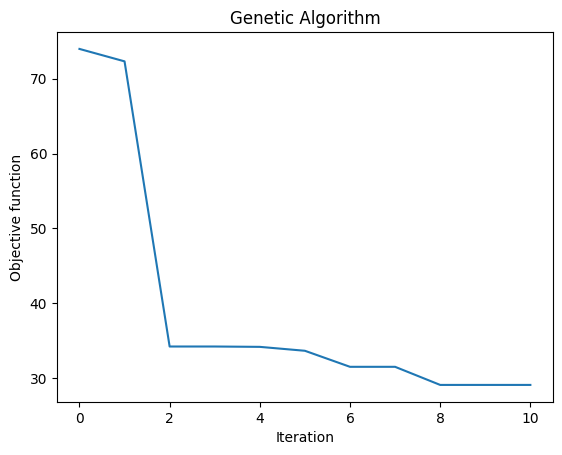

In [44]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

# Example objective function
def obj_fun(vector):
    # Example: assuming a simple function, replace with your actual function
    return sum(vector)

# Define the variable boundaries for 4 features
variable_boundaries = np.array([
    [df['NO2'].min(), df['NO2'].max()],
    [df['BP'].min(), df['BP'].max()],
    [df['RF'].min(), df['RF'].max()],
    [df['AT'].min(), df['AT'].max()]
])

# Define the algorithm parameters
algorithm_param = {
    'max_num_iteration': 10,
    'population_size': 100,
    'mutation_probability': 0.01,
    'elit_ratio': 0.01,
    'crossover_probability': 0.9,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None
}

# Create a genetic algorithm model using the specified parameters
ga_model = ga(
    function=obj_fun,
    dimension=4,  # Update to match the number of features
    variable_type='real',
    variable_boundaries=variable_boundaries,
    algorithm_parameters=algorithm_param
)

# Run the genetic algorithm
ga_model.run()


In [46]:
# Store the output results in a dictionary
result = ga_model.output_dict

# Display the results
print("Results: ")
print('NO2:', result['variable'][0])
print('BP:', result['variable'][1])
print('RF', result['variable'][2])
print('AT', result['variable'][3])
print("PM2.5 Prob: ", result['function'])

Results: 
NO2: 0.6162538772089838
BP: 26.816435712768374
RF 0.2349856163000684
AT 1.429262219401578
PM2.5 Prob:  29.096937425679005
